# Puerto Rico Power Plants Data Analysis `Kaggle Competition`
This notebook builds on exploratory data analysis provided for Kaggle's data analytics competition: DS4G: Environmental Insights Explorer

### Summary 
The goal of this notebook is to build on exploratory power plant data analysis and visulizations from map and satellite data
### Objective
The ultimate goal is to "develop a methodology to calculate an average historical emissions factor of electricity generated for a sub-national region, using remote sensing data and techniques" as per the competition's definition ([Kaggle DS4G competition homepage](https://www.kaggle.com/c/ds4g-environmental-insights-explorer "Competition homepage")).

At this time, exploratory data analysis is performed, such as the capacity, source of information, energy source and location of the power plants 
### Method
The processes within this Notebook is presented as:
- Data analysis in Pandas
- Primary visualizations in Matplotlib.pyplot and Seaborn
- Map data visualization in Folium
- Satellite ratster dataset using Rasterio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
import os

In [4]:
import datetime as dt
from datetime import datetime

In [11]:
import folium
import rasterio as rio

In [12]:
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [23]:
pd.set_option('max_columns',None)

In [295]:
#Power plants in Puerto Rico
global_power_plants = pd.read_csv('./eie_data/gppd/gppd_120_pr.csv')
print(global_power_plants.shape)
global_power_plants.head(3)

(35, 24)


,system:index,capacity_mw,commissioning_year,country,country_long,estimated_generation_gwh,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,geolocation_source,gppd_idnr,name,other_fuel1,other_fuel2,other_fuel3,owner,primary_fuel,source,url,wepp_id,year_of_capacity_data,.geo
0,0000000000000000315a,15.0,1942.0,USA,United States of America,685.397712,0.0,0.0,0.0,0.0,0.0,WRI,WRI1026827,Dos Bocas,NaN,NaN,NaN,PREPA,Hydro,CEPR,http://energia.pr.gov/datos/plantas/,30936.0,0,"{""type"":""Point"",""coordinates"":[-66.66629863706..."
1,000000000000000026e5,1492.0,1975.0,USA,United States of America,8334.010812,0.0,0.0,0.0,0.0,0.0,WRI,WRI1026809,Aguirre,NaN,NaN,NaN,PREPA,Oil,PREPA,http://www.prepa.com/aguirre.asp,30928.0,0,"{""type"":""Point"",""coordinates"":[-66.23079607357..."
2,00000000000000002fda,990.0,1962.0,USA,United States of America,5529.940150,0.0,0.0,0.0,0.0,0.0,WRI,WRI1026811,Costa Sur,NaN,NaN,NaN,PREPA,Oil,PREPA,http://www.prepa.com/costasur.asp,30934.0,0,"{""type"":""Point"",""coordinates"":[-66.75340271704..."


In [58]:
global_power_plants.primary_fuel.value_counts()

Hydro    11
Gas       9
Oil       6
Solar     6
Wind      2
Coal      1
Name: primary_fuel, dtype: int64

Text(0, 0.5, 'count')

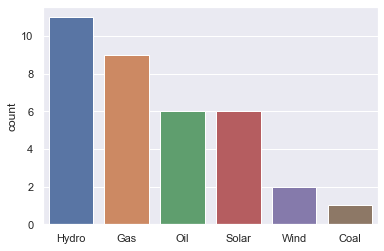

In [95]:
sns.barplot(x=global_power_plants.primary_fuel.value_counts().index, y=global_power_plants.primary_fuel.value_counts().values)
plt.ylabel('count')

Text(0, 0.5, 'count')

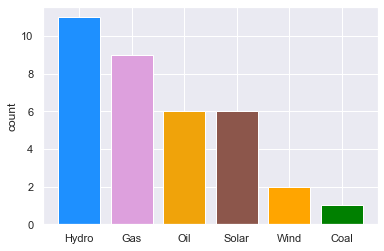

In [411]:
plt.bar(x=global_power_plants.primary_fuel.value_counts().index, height=global_power_plants.primary_fuel.value_counts().values,color=colors)
plt.ylabel('count')

In [82]:
global_power_plants.commissioning_year.value_counts()

0.0       21
2012.0     2
1941.0     2
2015.0     1
2011.0     1
2009.0     1
1937.0     1
1929.0     1
1915.0     1
1960.0     1
1962.0     1
1975.0     1
1942.0     1
Name: commissioning_year, dtype: int64

Text(0.5, 0, 'count')

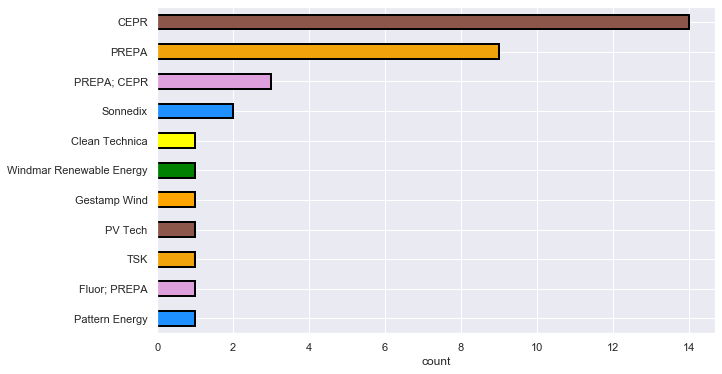

In [429]:
fig= plt.gcf()
fig.set_size_inches(10,6)
colors = ['dodgerblue', 'plum', '#F0A30A','#8c564b','orange','green','yellow']
global_power_plants.source.value_counts(ascending=True).plot(kind='barh',linewidth=2,color=colors,edgecolor='black')
plt.xlabel('count')

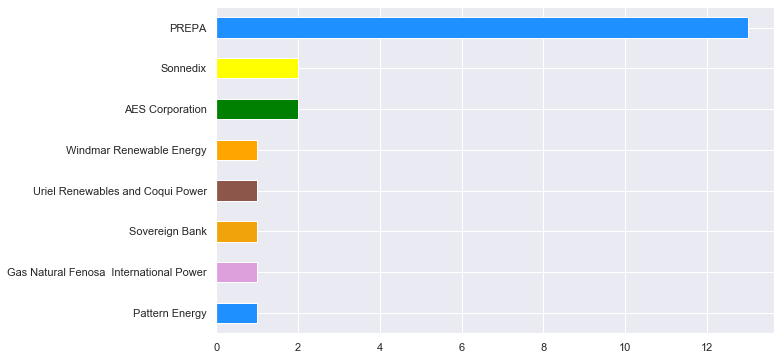

In [136]:
fig = plt.gcf()
fig.set_size_inches(10,6)
global_power_plants.owner.value_counts(ascending=True).plot(kind='barh',color= colors)

In [138]:
total_capacity_mw = global_power_plants.capacity_mw.sum()
total_capacity_mw

6148.449985861778

In [177]:
capacity = (global_power_plants.groupby('primary_fuel')['capacity_mw'].sum()).to_frame()
capacity = capacity.sort_values('capacity_mw',ascending=False)
capacity['percentage_of_total'] = (capacity.capacity_mw/total_capacity_mw)*100
capacity

,capacity_mw,percentage_of_total
primary_fuel,,
Oil,4201.500000,68.334296
Gas,1105.000000,17.972009
Coal,454.299988,7.388854
Solar,154.650002,2.515268
Wind,124.599997,2.026527
Hydro,108.400000,1.763046


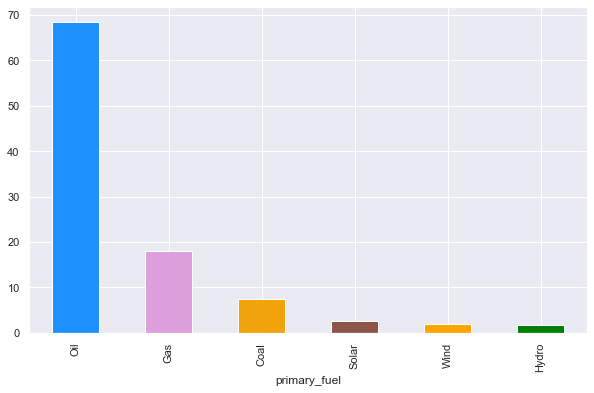

In [189]:
fig = plt.gcf()
fig.set_size_inches(10,6)
colors = ['dodgerblue', 'plum', '#F0A30A','#8c564b','orange','green','yellow']
capacity.percentage_of_total.plot(kind='bar',color=colors)

In [196]:
total_gen_mw = global_power_plants.estimated_generation_gwh.sum()
print('Total Generatation: '+'{:.2f}'.format(total_gen_mw) + ' GW')

Total Generatation: 486860.88 GW


In [216]:
generation = global_power_plants.groupby('primary_fuel').sum()['estimated_generation_gwh'].to_frame()
generation = generation.sort_values('estimated_generation_gwh',ascending=False)
generation['percentage_of_total'] = (generation.estimated_generation_gwh/total_gen_mw)*100
generation

,estimated_generation_gwh,percentage_of_total
primary_fuel,,
Coal,450562.692350,92.544444
Oil,23468.730848,4.820418
Gas,7785.243454,1.599069
Hydro,4953.140798,1.017363
Solar,68.962714,0.014165
Wind,22.104981,0.004540


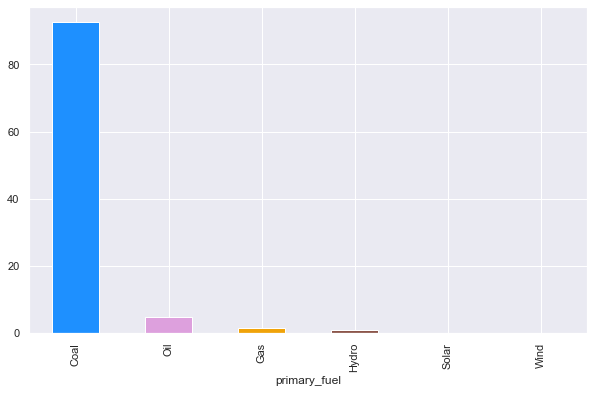

In [218]:
fig = plt.gcf()
fig.set_size_inches(10,6)
generation.percentage_of_total.plot(kind='bar', color=colors)

In [219]:
from folium import plugins

In [296]:
#dissociate latitude and longitude from '.geo' column
for i in range(0,len(global_power_plants)):
    global_power_plants.loc[i,'latitude'] = global_power_plants.at[i,'.geo'][50:66]
    global_power_plants.loc[i,'longitude'] = global_power_plants.at[i,'.geo'][31:48]

global_power_plants.latitude = global_power_plants.latitude.astype(float)

In [399]:
#problem with some latitudes being 10 less than the true value
a = np.array(global_power_plants.latitude.tolist())
global_power_plants.latitude = np.where(a<10, a+10, a)

In [434]:
#power plants on map
location=[18.200178,-66.664513]
zoom = 9
plot = folium.Map(location=location, zoom_start=zoom, tiles='Stamen Terrain')

for i in range(0,len(global_power_plants)):
    
    popup = folium.Popup(html=str(global_power_plants.primary_fuel[i:i+1]))
    
    folium.Marker(location=[global_power_plants.latitude.iloc[i],global_power_plants.longitude.iloc[i]],\
                  popup=popup, icon=folium.Icon(color='white', icon_color='red'),\
                  tooltip = global_power_plants.name.iloc[i]).add_to(plot)

plot

In [ ]:
#Overlay image on folium map
file_name = './eie_data/s5p_no2/s5p_no2_20180708T172237_20180714T190743.tif''
lat = 18.1429005246921
long = -65.4440010699994

band = rio.open(file_name).read(band_layer=1)
m = folium.Map([lat,long], zoom_start=8)

folium.raster_layers.ImageOverlay(image=band, bounds = [[18.6,-67.3,],[17.9,-65.2]],\
                                  colormap=lambda x: (1, 0, 0, x),).add_to(m)
m